Logistic Regression Model:
Accuracy: 0.90
Precision: 0.91
Recall: 0.81
F1 Score: 0.86
ROC AUC: 0.94



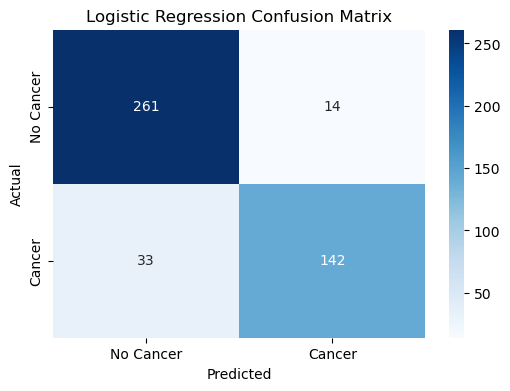

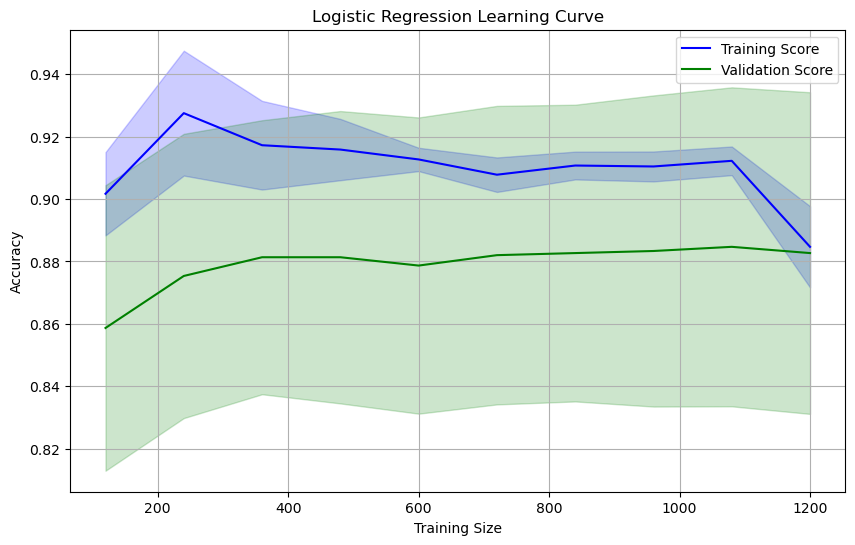

Decision Tree Model:
Accuracy: 0.86
Precision: 0.85
Recall: 0.77
F1 Score: 0.81
ROC AUC: 0.84



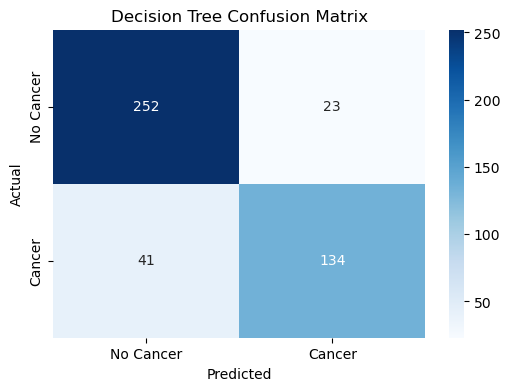

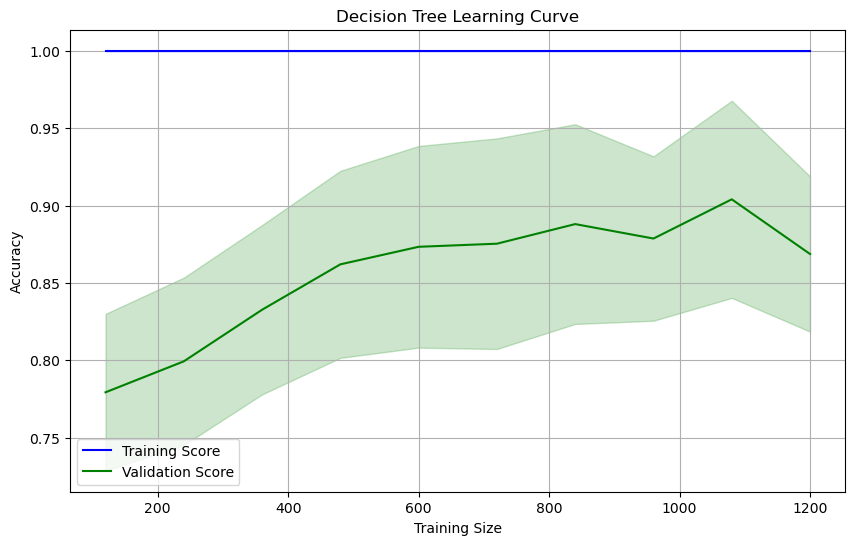

Random Forest Model:
Accuracy: 0.92
Precision: 0.93
Recall: 0.86
F1 Score: 0.89
ROC AUC: 0.95



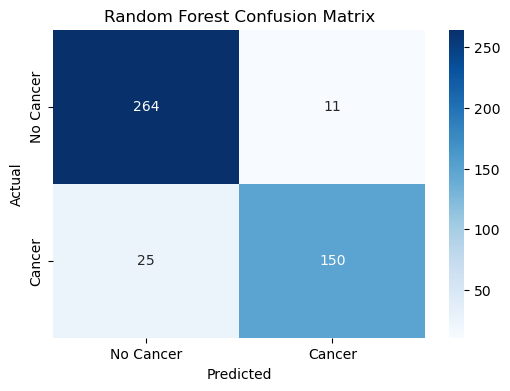

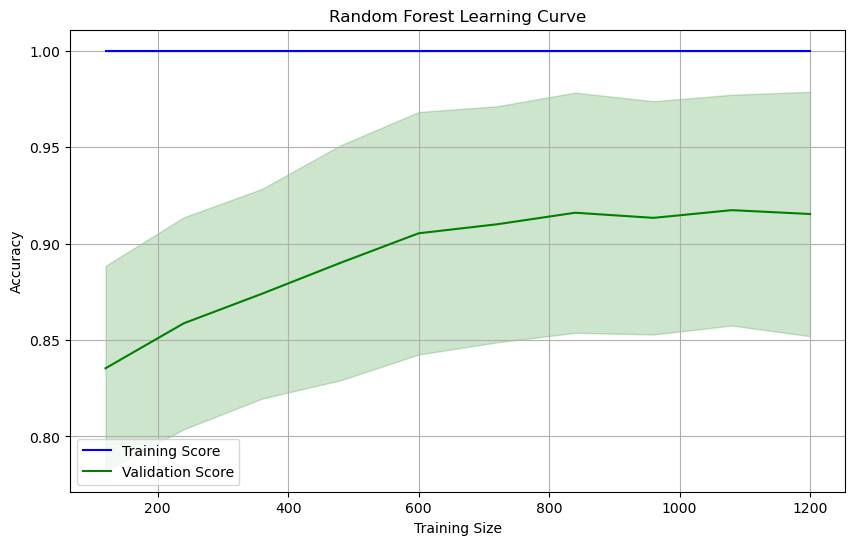

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score, roc_auc_score)

# Load dataset
df = pd.read_csv(r"C:\Users\IDRESS COMPUTERS\Desktop\Training sets\The_Cancer_data_1500_V2.csv")

# Define features and target variable
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocessing: Standardize numerical features and encode categorical features
numeric_features = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']
categorical_features = ['Gender', 'Smoking', 'GeneticRisk', 'CancerHistory']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
#function to do predictions on final model

def evaluate_model(model, model_name,data):
    # Create a pipeline with preprocessing and the specified classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(data)
    y_prob = pipeline.predict_proba(data)[:, 1]
    return y_pred,y_prob

# Function to fit model, make predictions, and evaluate
def evaluate_model_together(model, model_name):
    # Create a pipeline with preprocessing and the specified classifier
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probability of having cancer

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f'{model_name} Model:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}\n')

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    

    # Learning Curve Calculation
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X, y, 
                                                             train_sizes=np.linspace(0.1, 1.0, 10),
                                                             cv=5, scoring='accuracy')
    
    # Calculate the mean and standard deviation for training and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting the Learning Curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Score', color='green')

    # Plot the standard deviation as a shaded area
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

    # Adding labels and title
    plt.title(f'{model_name} Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

# Evaluate Logistic Regression
evaluate_model_together(LogisticRegression(), 'Logistic Regression')

# Evaluate Decision Tree
evaluate_model_together(DecisionTreeClassifier(random_state=42), 'Decision Tree')

# Evaluate Random Forest
evaluate_model_together(RandomForestClassifier(random_state=42), 'Random Forest')

In [78]:
def cancer_test(age,gender,bmi,smokingStat,geneticRisk,physcicalState,alcoholIntake,cancerHist):
    new_data = pd.DataFrame({
    'Age': age,  
    'Gender': gender,  
    'BMI': bmi,  
    'Smoking': smokingStat,  
    'GeneticRisk': geneticRisk,  
    'PhysicalActivity': physcicalState, 
    'AlcoholIntake': alcoholIntake,
    'CancerHistory': cancerHist
    })
    print([new_data])
    predictions, predicted_probabilities = evaluate_model(RandomForestClassifier(random_state=42), 'Random Forest',new_data)
        
    return predictions,predicted_probabilities

In [79]:
m = int(input('how many patients do you want to test?'))

age = np.zeros(m)
gender = np.zeros(m)
bmi = np.zeros(m)
smokingStat = np.zeros(m)
geneticRisk = np.zeros(m)
physicalState = np.zeros(m)
alcohol = np.zeros(m)
cancerHist = np.zeros(m)
for i in range(m):
    age[i] = int(input(f"Enter patient {i+1}'s age:"))
    gender[i] = int(input(f"Enter patient {i+1}'s gender (1 for female, 0 for male):"))
    bmi[i] = float(input(f"Enter patient {i+1}'s BMI:"))
    smokingStat[i] = int(input(f"Enter patient {i+1}'s smoking status (1 for yes, 0 for No):"))
    geneticRisk[i] = int(input(f"Enter patient {i+1}'s genetic risk of having cancer (1 for normal 0, for low and 2 for high):"))
    physicalState[i] = float(input(f"Enter how many hours patient {i+1} exercises per day:"))
    alcohol[i] =  float(input(f"Enter patient {i+1}'s alcohol intake(1-5):"))
    cancerHist[i] = int(input('Have you ever suffered from cancer before? 1 for yes and 0 for no:'))

prediction,predicted_probabilities= cancer_test(age,gender,bmi,smokingStat,geneticRisk,physicalState,alcohol,cancerHist)


for i in range(m):
    result = "Oopss looks like you've got Cancer" if prediction[i] == 1 else "Congratulations you are clean No Cancer" 
    print(f"Patient {i + 1}: {result} (Probability: {predicted_probabilities[i]})")

how many patients do you want to test?2
Enter patient 1's age:23
Enter patient 1's gender (1 for female, 0 for male):1
Enter patient 1's BMI:26
Enter patient 1's smoking status (1 for yes, 0 for No):0
Enter patient 1's genetic risk of having cancer (1 for normal 0, for low and 2 for high):1
Enter how many hours patient 1 exercises per day:0
Enter patient 1's alcohol intake(1-5):3
Have you ever suffered from cancer before? 1 for yes and 0 for no:0
Enter patient 2's age:19
Enter patient 2's gender (1 for female, 0 for male):0
Enter patient 2's BMI:26.7
Enter patient 2's smoking status (1 for yes, 0 for No):0
Enter patient 2's genetic risk of having cancer (1 for normal 0, for low and 2 for high):0
Enter how many hours patient 2 exercises per day:2
Enter patient 2's alcohol intake(1-5):1
Have you ever suffered from cancer before? 1 for yes and 0 for no:0
    Age  Gender   BMI  Smoking  GeneticRisk  PhysicalActivity  AlcoholIntake  \
0  23.0     1.0  26.0      0.0          1.0             